In [114]:
import pandas as pd
import numpy as np

In [115]:
df_votants = pd.read_csv('database_deputes.csv', index_col=0)
df_votes = pd.read_csv('database_votes2.csv', index_col=0)

In [116]:
df_votes['Pour'] = np.where(df_votes['vote']== 'Pour', 1, 0)
df_votes['Contre'] = np.where(df_votes['vote']== 'Contre', 1, 0)
df_votes['Non-votant'] = np.where(df_votes['vote']== 'Non-votant', 1, 0)

In [117]:
df_votes[df_votes['date_scrutin'].str.startswith('2020')].groupby('idScrutin').count() #701 scrutins
df_votes[df_votes['date_scrutin'].str.startswith('2019')].groupby('idScrutin').count() #804 scrutins
df_votes[df_votes['date_scrutin'].str.startswith('2018')].groupby('idScrutin').count() #1255 scrutins
df_votes[df_votes['date_scrutin'].str.startswith('2017')].groupby('idScrutin').count() #357 scrutins

,idVotant,vote,organeRefGroupe,date_scrutin,code_type_vote,titre,demandeur,organe_ref,votants,pour,...,Profession,Groupe politique (complet),Groupe politique (abrégé),date_naissance,type_mandat,type_organe,qualite_mandat,Pour,Contre,Non-votant
idScrutin,,,,,,,,,,,,,,,,,,,,,
3,97,97,97,97,97,97,97,97,97,97,...,97,97,97,8,8,8,8,97,97,97
13,74,74,74,74,74,74,74,74,74,74,...,74,74,74,8,8,8,8,74,74,74
14,85,85,85,85,85,85,85,85,85,85,...,84,85,85,4,4,4,4,85,85,85
22,126,126,126,126,126,126,126,126,126,126,...,125,126,126,7,7,7,7,126,126,126
33,156,156,156,156,156,156,156,156,156,156,...,155,156,156,13,13,13,13,156,156,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,50,50,50,50,50,50,50,50,50,50,...,48,50,50,7,7,7,7,50,50,50
3102,396,396,396,396,396,396,396,396,396,396,...,392,396,396,75,75,75,75,396,396,396
3110,77,77,77,77,77,77,77,77,77,77,...,77,77,77,8,8,8,8,77,77,77


In [118]:
df_2020 = df_votes[df_votes['date_scrutin'].str.startswith('2020')]
df_2019 = df_votes[df_votes['date_scrutin'].str.startswith('2019')]
df_2018 = df_votes[df_votes['date_scrutin'].str.startswith('2018')]
df_2017 = df_votes[df_votes['date_scrutin'].str.startswith('2017')]

In [119]:
def accord_parti_annee (df_votes):
    df_grouped = df_votes[['vote', 'Pour', 'Contre', 'Non-votant', 'idScrutin', 'Groupe politique (complet)']].groupby(['Groupe politique (complet)', 'idScrutin']).sum()
    df_grouped = df_grouped.assign(vote_maj_parti=df_grouped.idxmax(1))
    df_grouped = df_grouped.drop(['Pour', 'Contre', 'Non-votant'], axis =1)
    df_votes2 = df_votes.merge(df_grouped, on=['Groupe politique (complet)', 'idScrutin'], how='left')
    Partis = pd.DataFrame(df_votes2.groupby('idVotant')['Groupe politique (complet)'].unique())
    df3= df_votes2[((df_votes2.vote == 'Pour') & (df_votes2.vote_maj_parti == 'Pour')) | ((df_votes2.vote == 'Contre') & (df_votes2.vote_maj_parti == 'Contre')) | ((df_votes2.vote == 'Non-votant') & (df_votes2.vote_maj_parti == 'Non-votant'))]

    Accord_votant = df3.idVotant.value_counts() 
    Total_votant = df_votes2.idVotant.value_counts()

    IndiceAccordParti=[]
    
    Votants2=df3['idVotant'].unique()

    for votant in Votants2:     
        IndiceAccordParti.append(int(Accord_votant[votant])/int(Total_votant[votant])*100)
    
    IndiceAccordPartiDF = pd.DataFrame({'idVotant' : Votants2,
                               'IndiceAccordParti' : IndiceAccordParti})
    return (IndiceAccordPartiDF)

In [120]:
accord_2020 = accord_parti_annee(df_2020)
accord_2020=accord_2020.rename(columns = {'IndiceAccordParti' : 'indice_accord_2020'})
df_votes = df_votes.merge(accord_2020, on = 'idVotant')

In [121]:
accord_2019 = accord_parti_annee(df_2019)
accord_2019=accord_2019.rename(columns = {'IndiceAccordParti' : 'indice_accord_2019'})
df_votes = df_votes.merge(accord_2019, on = 'idVotant')

In [122]:
accord_2018 = accord_parti_annee(df_2018)
accord_2018=accord_2018.rename(columns = {'IndiceAccordParti' : 'indice_accord_2018'})
df_votes = df_votes.merge(accord_2018, on = 'idVotant')

In [123]:
accord_2017 = accord_parti_annee(df_2017)
accord_2017=accord_2017.rename(columns = {'IndiceAccordParti' : 'indice_accord_2017'})
df_votes = df_votes.merge(accord_2017, on = 'idVotant')

In [126]:
df_accord = df_votes[['idVotant', 'Groupe politique (complet)', 'indice_accord_2020', 'indice_accord_2019', 'indice_accord_2018', 'indice_accord_2017']].drop_duplicates()

In [128]:
df_accord = df_accord.set_index('idVotant')

In [129]:
df_accord #573 députés ?????? 

,Groupe politique (complet),indice_accord_2020,indice_accord_2019,indice_accord_2018,indice_accord_2017
idVotant,,,,,
PA606171,La République en Marche,23.652174,24.256651,28.917197,39.759036
PA721824,La République en Marche,43.506494,25.870647,38.327526,54.629630
PA719952,La République en Marche,100.000000,99.363057,99.319728,99.074074
PA607395,La République en Marche,100.000000,97.777778,100.000000,94.117647
PA718710,La République en Marche,96.929825,96.956522,98.055556,97.163121
...,...,...,...,...,...
PA643004,UDI et Indépendants,100.000000,100.000000,100.000000,100.000000
PA774958,Socialistes et apparentés,100.000000,100.000000,100.000000,100.000000
PA643192,Socialistes et apparentés,92.307692,100.000000,90.000000,66.666667


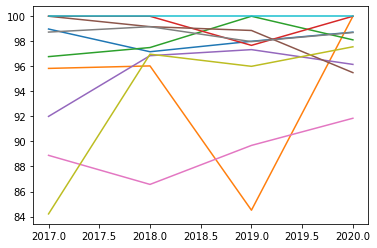

In [182]:
votants = np.random.choice(list(df_accord.index), 10)
for votant in votants:
    evolution = []
    date = ['indice_accord_2017', 'indice_accord_2018', 'indice_accord_2019', 'indice_accord_2020']
    for annee in date : 
        evolution.append(df_accord.loc[votant][annee])
    import matplotlib.pyplot as plt
    x = [2017, 2018, 2019, 2020]
    plt.plot(x, evolution)